$\textbf{PROGRAMMING ASSIGNMENT}$
---
# Support Vector Machines 
## Instructions
1. Use any dataset from https://archive.ics.uci.edu/datasets?Task=Clustering&skip=0&take=10&sort=desc&orderBy=NumHits&search=&Area=Biology
2. Each student should have a unique dataset otherwise no points will be given, so you need to discuss with your classmate.

**TASK: Take 10 moderately sized subsamples your dataset and create a correlation plot for each subsample**

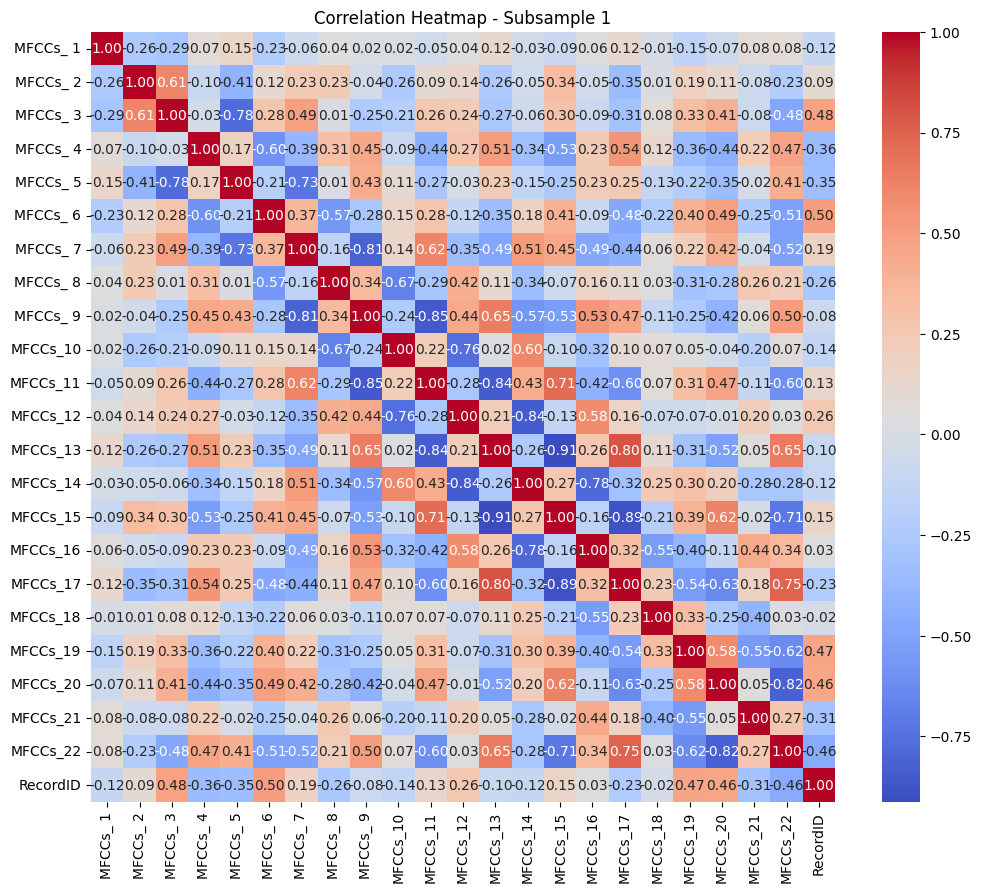

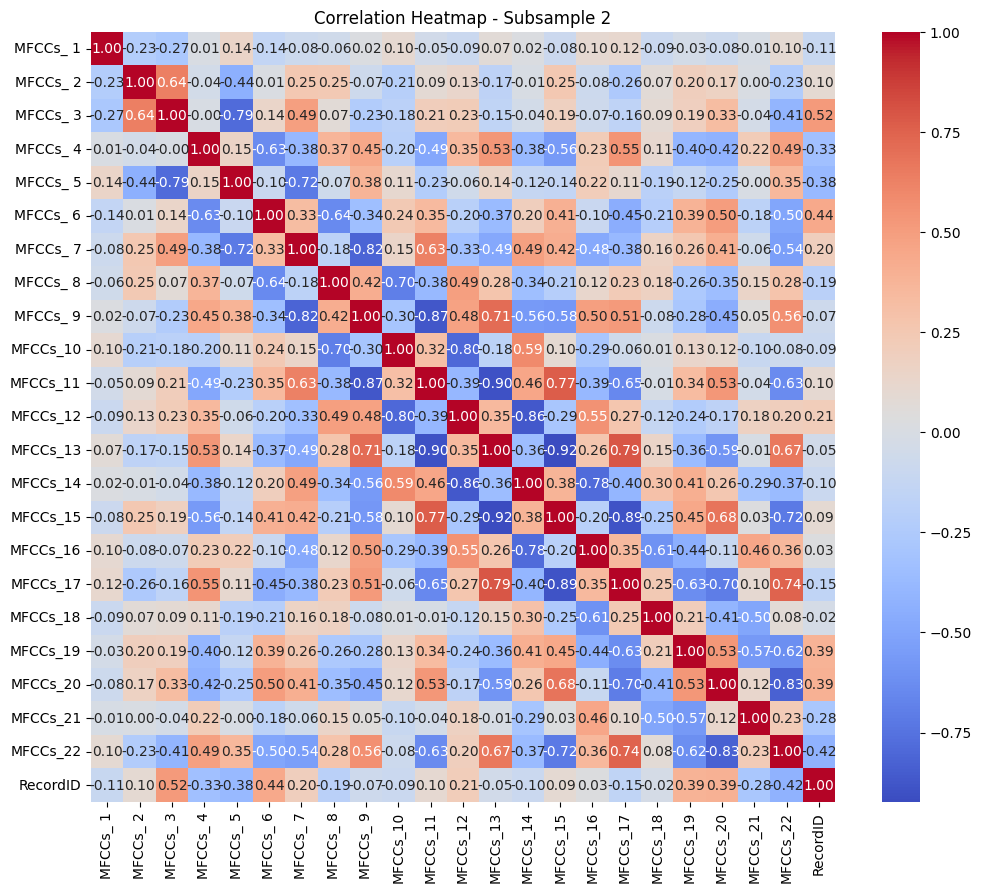

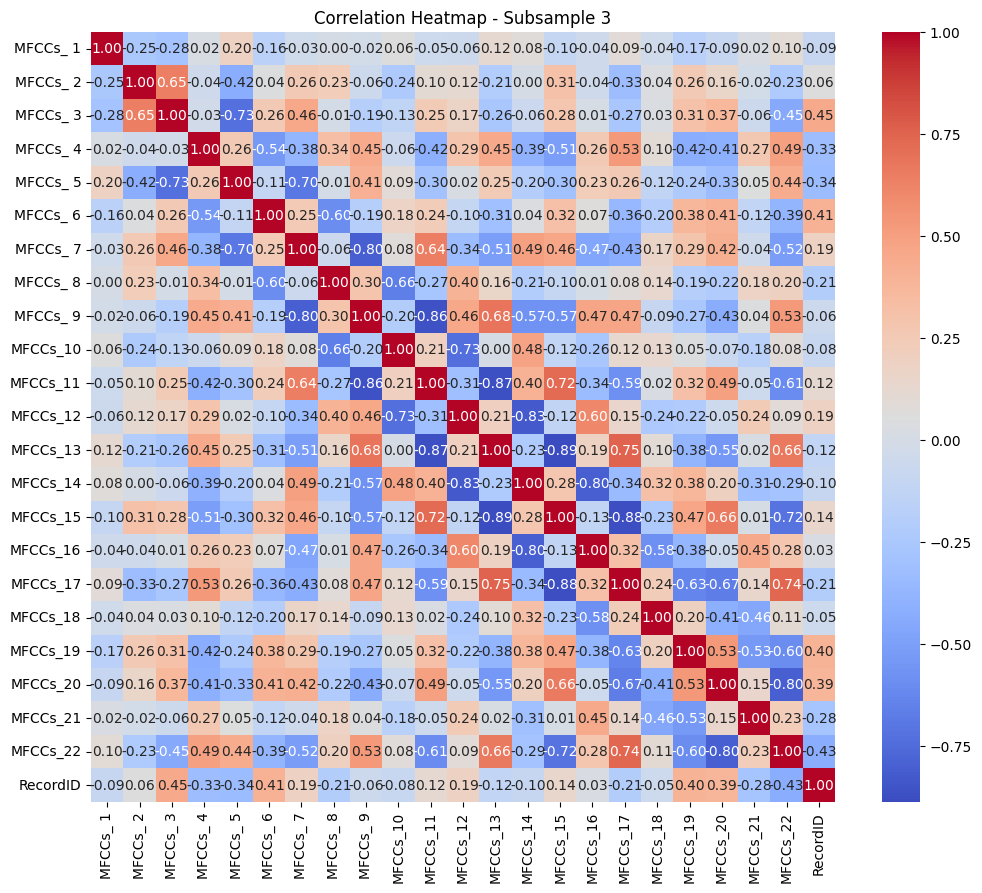

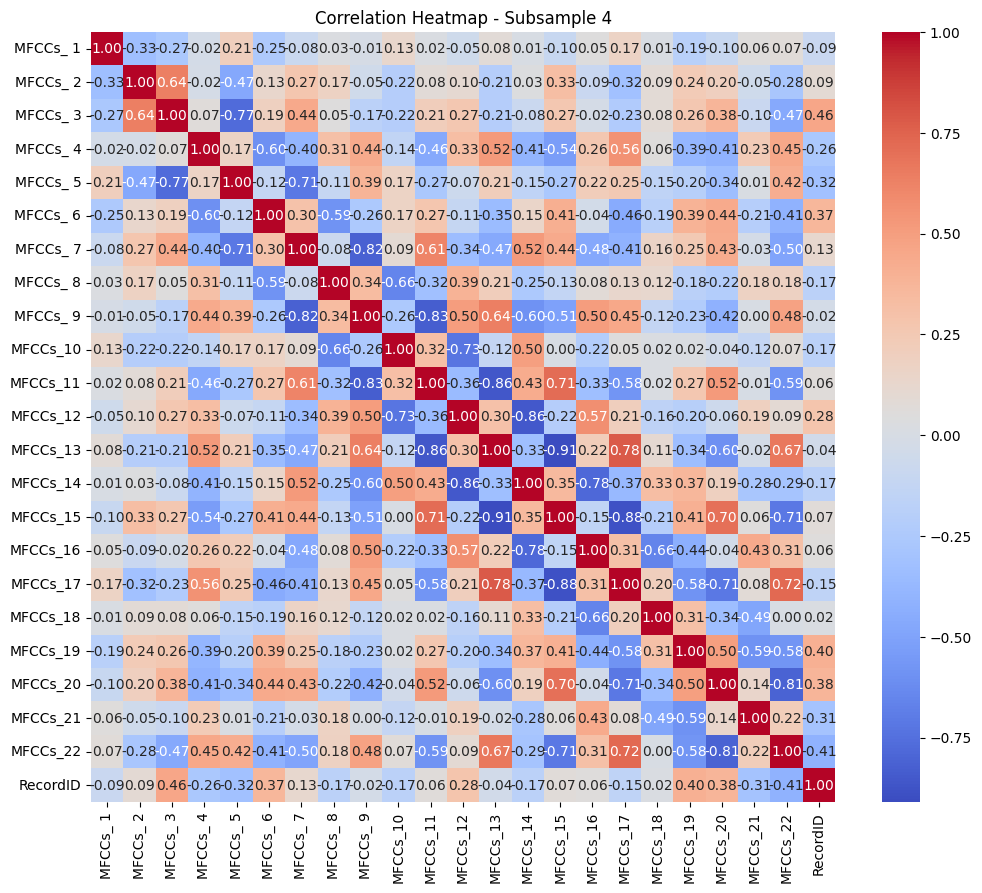

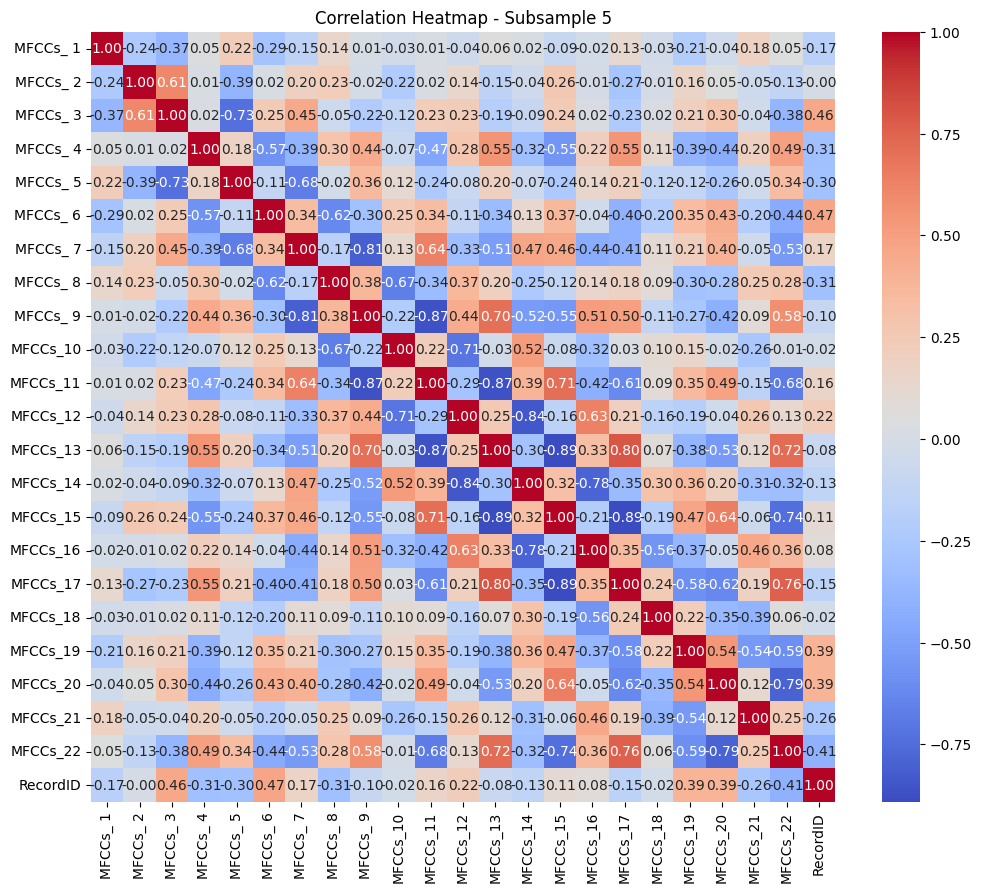

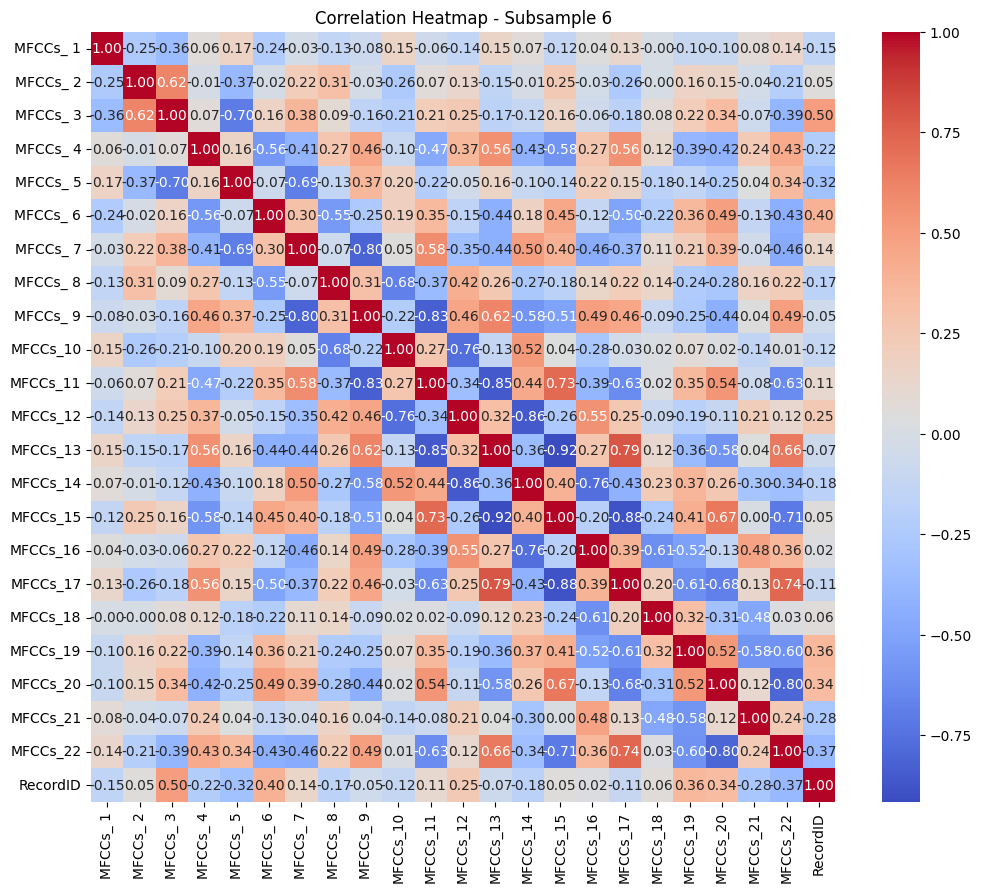

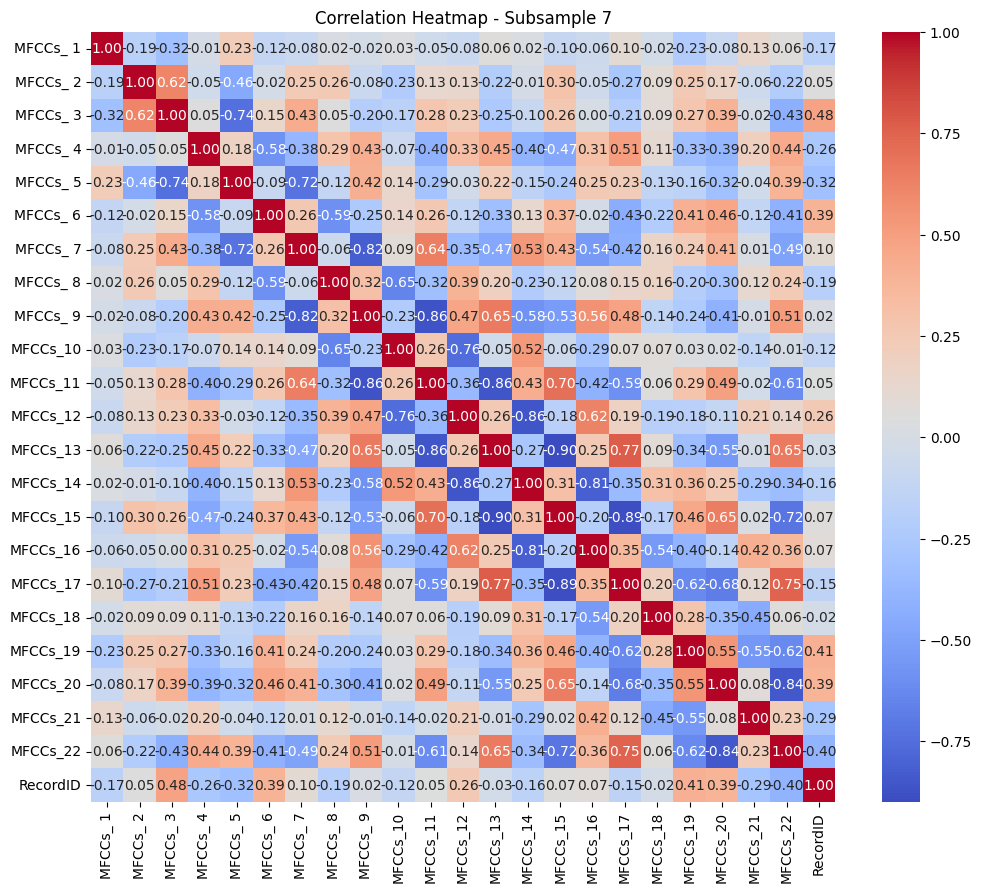

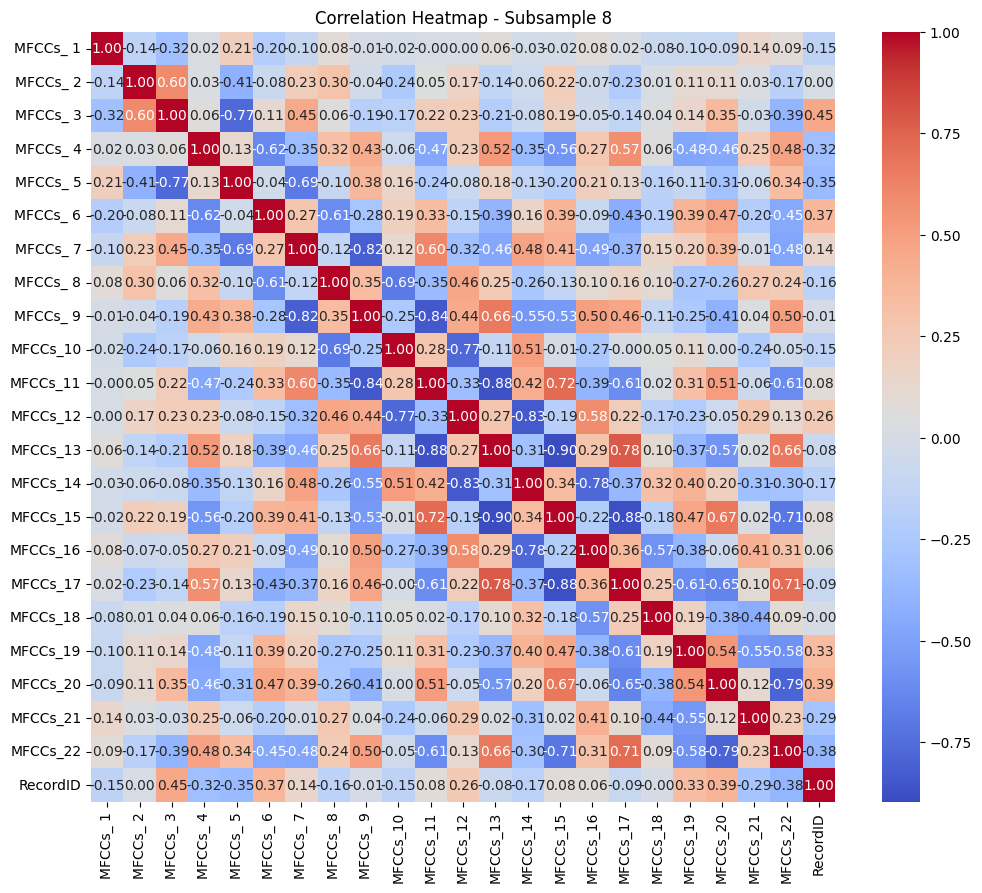

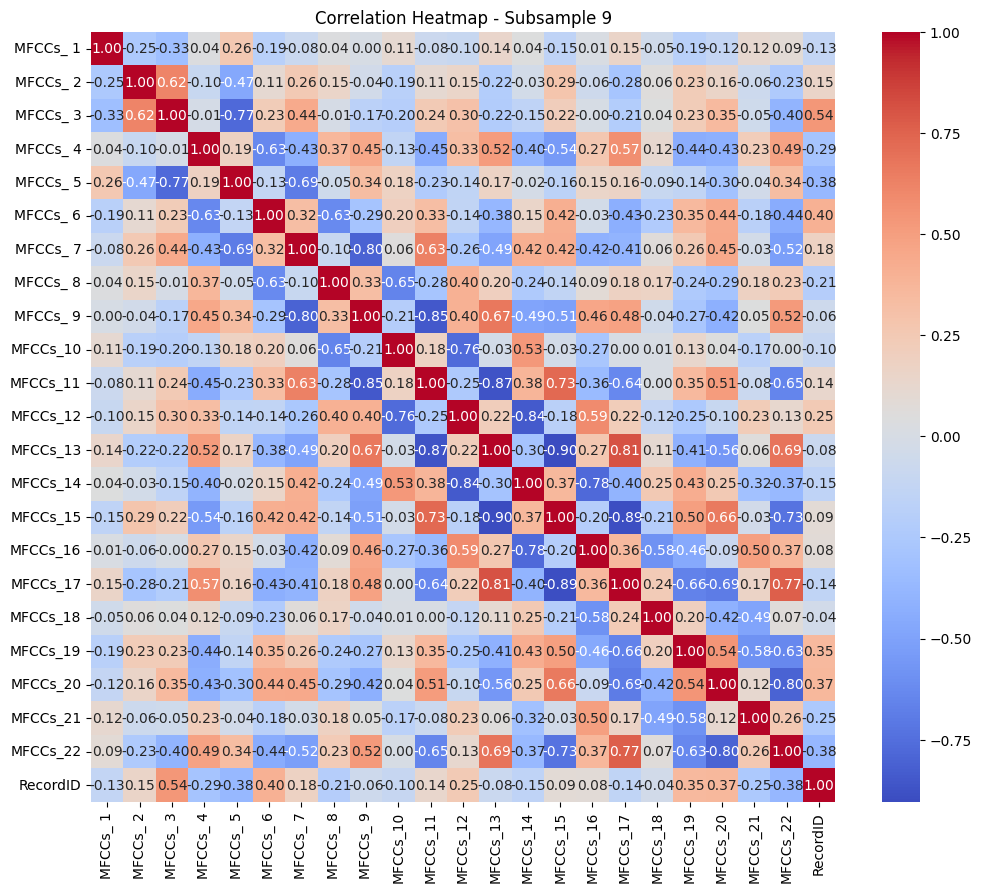

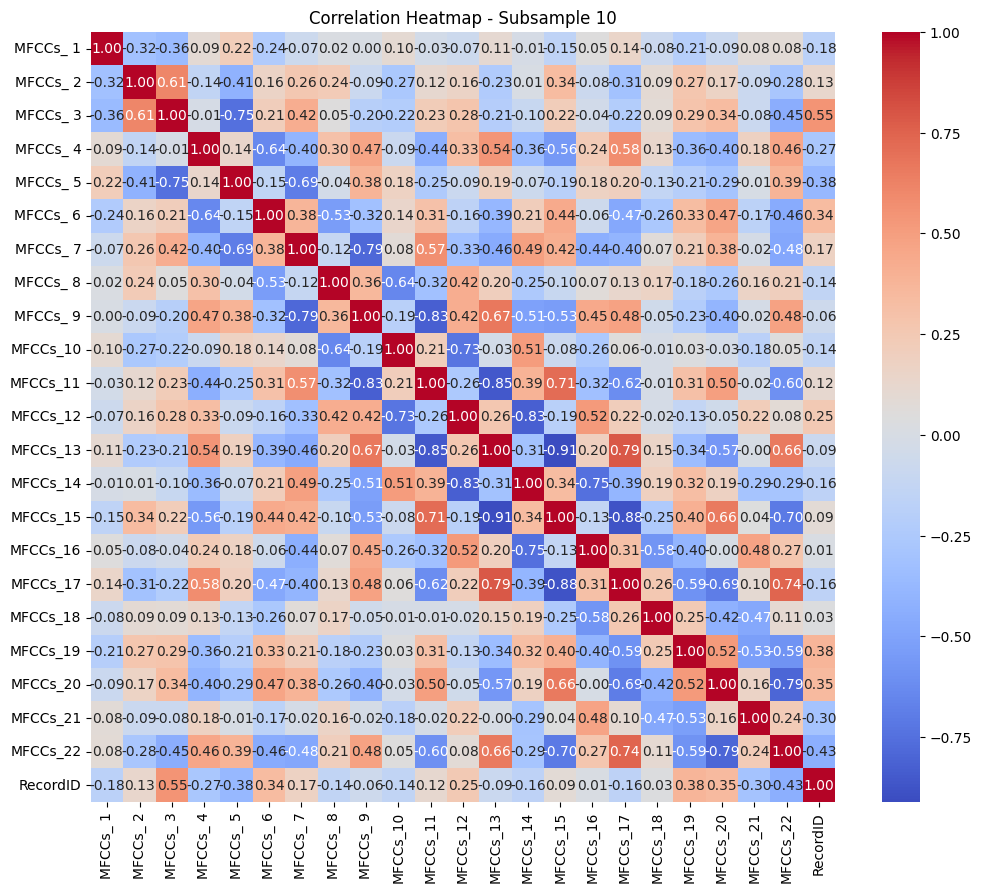

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
frog_usage = pd.read_csv('Frogs_MFCCs.csv')  # Replace 'path_to_your_dataset.csv' with the actual path

# Drop rows with non-numeric values
frog_usage_numeric = frog_usage.dropna().select_dtypes(include=[np.number])

# Define the number of subsamples
num_subsamples = 10

# Define the size of each subsample (moderately sized)
subsample_size = len(frog_usage_numeric) // num_subsamples

# Create a list to store the correlation plots
correlation_plots = []

# Randomly select subsamples and create correlation plots
for i in range(num_subsamples):
    # Randomly select rows for the subsample
    subsample_indices = np.random.choice(frog_usage_numeric.index, size=subsample_size, replace=False)
    
    # Extract the subsample from the dataset
    subsample = frog_usage_numeric.loc[subsample_indices]
    
    # Calculate the correlation matrix for the subsample
    correlation_matrix = subsample.corr()
    
    # Plot the correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Heatmap - Subsample {i+1}')
    plt.show()

**TASK (Classification | Applicable): If your problem is a classification problem visually check if the target variable is imbalanced**<br>
**TASK (Regression | N/A): If your problem is a regression problem visually the distribution of your target variabe**

Index(['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6',
       'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12',
       'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18',
       'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'MFCCs_22', 'Family', 'Genus',
       'Species', 'RecordID'],
      dtype='object')


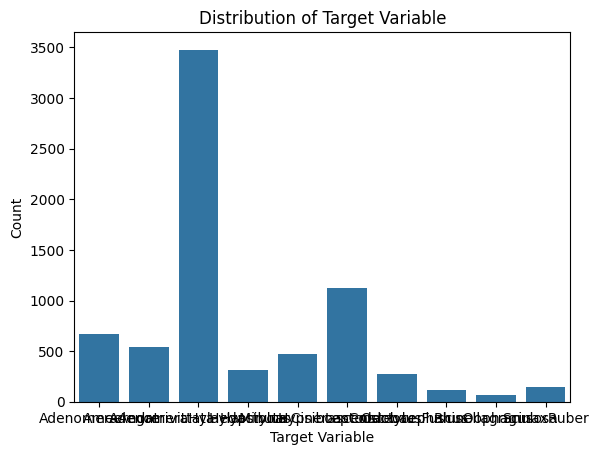

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the column names in your DataFrame
print(frog_usage.columns)

# Assuming the target variable column is named 'Species'
sns.countplot(x='Species', data=frog_usage)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()

**TASK: Take 10 moderately sized subsamples and create a pairplot of the feature variable in relation to the target variable**

**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

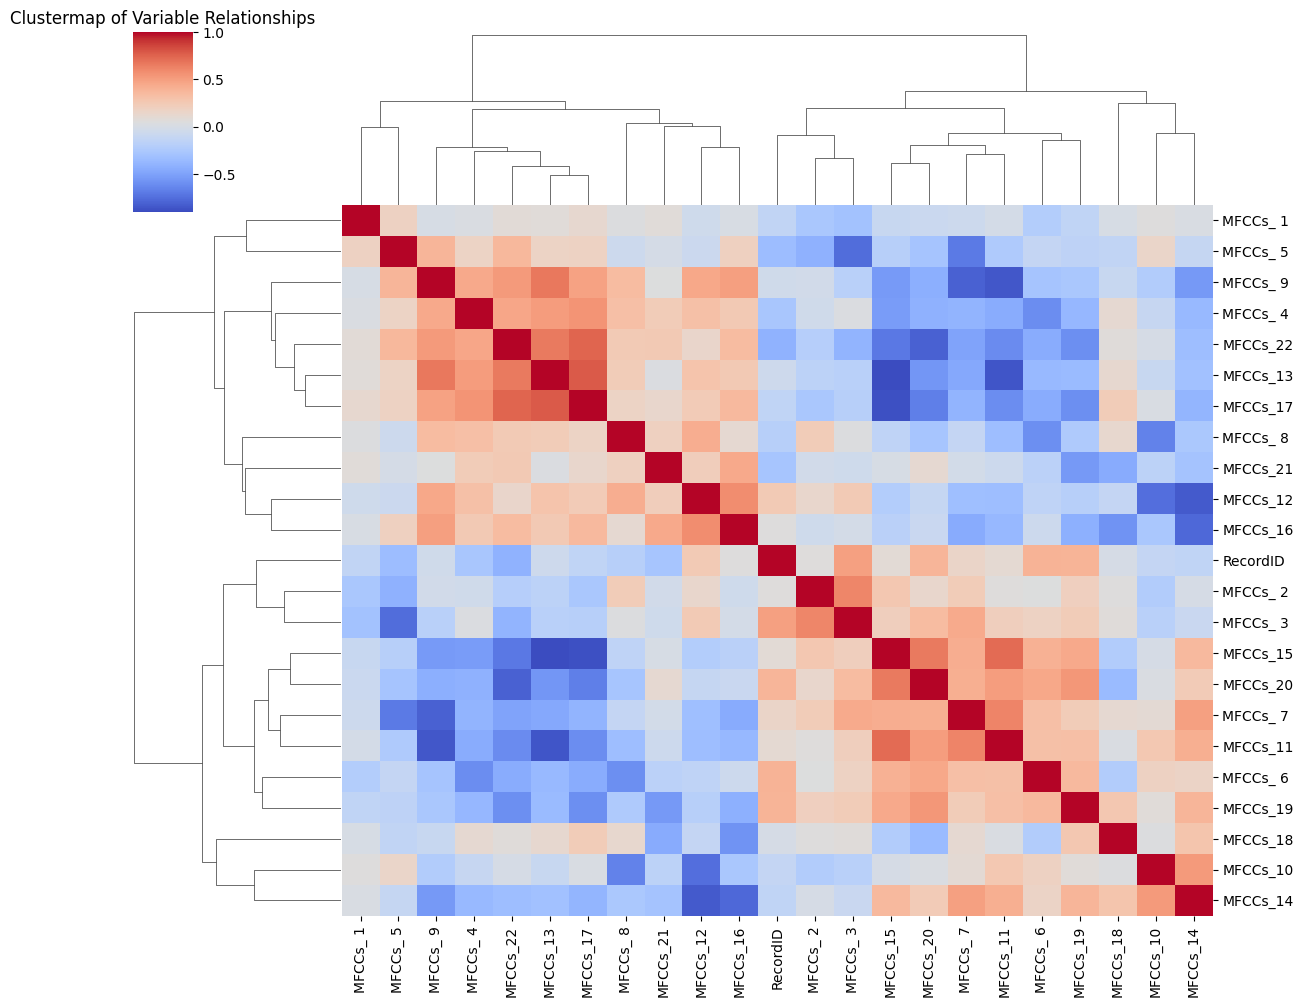

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns
numeric_frog_usage = frog_usage.select_dtypes(include='number')

# Create the clustermap
sns.clustermap(numeric_frog_usage.corr(), cmap='coolwarm', figsize=(12, 10))
plt.title('Clustermap of Variable Relationships')
plt.show()

**TASK: Perform SVM modelling and check the performance of your model, improve the performance of your model using grdisearch**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR  # Import SVR for Support Vector Regression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Prepare the Data
target_column = 'MFCCs_ 1'

# Extract features (X) and target (y)
X = frog_usage_numeric.drop(columns=['MFCCs_ 1'])
y = frog_usage_numeric[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Build a Baseline SVR Model
svr_baseline = SVR()
svr_baseline.fit(X_train, y_train)
baseline_predictions = svr_baseline.predict(X_test)

# Evaluate baseline model
print("Baseline SVR Model Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, baseline_predictions))
print("R-squared Score:", r2_score(y_test, baseline_predictions))

# 3. Tune Hyperparameters using GridSearch
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear', 'poly']}
svr_grid_search = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)
svr_grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters:", svr_grid_search.best_params_)

# 4. Evaluate Model Performance
grid_predictions = svr_grid_search.predict(X_test)

print("\nTuned SVR Model Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, grid_predictions))
print("R-squared Score:", r2_score(y_test, grid_predictions))


Baseline SVR Model Performance:
Mean Squared Error: 0.010382077240781818
R-squared Score: -2.6726553481179924
Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-1.131 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-1.141 total time=   0.1s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.819 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.722 total time=   0.1s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-1.026 total time=   0.1s
[CV 1/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.024 total time=   0.2s
[CV 2/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.139 total time=   0.3s
[CV 3/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.069 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.027 total time=   0.2s
[CV 5/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.054 total time=   0.2s
